In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [3]:
# Predefined list of popular stocks
STOCK_OPTIONS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA']

# Linked List Implementation for Stock Data
class StockNode:
    def __init__(self, symbol, data):
        self.symbol = symbol  # Stock symbol
        self.data = data  # Stock data (e.g., pandas DataFrame)
        self.next = None  # Link to the next node

class StockLinkedList:
    def __init__(self):
        self.head = None  # Head of the linked list

    def add_stock(self, symbol, data):
        new_node = StockNode(symbol, data)
        if not self.head:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node

    def find_stock(self, symbol):
        current = self.head
        while current:
            if current.symbol == symbol:
                return current.data
            current = current.next
        return None  # Stock not found

# Function to fetch stock data for a specific time range using yfinance
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)  
    if not stock_data.empty:
        return stock_data
    else:
        print(f"Error fetching data for {symbol}!")
        return None

# Predictive Analysis (Linear Regression)
def predict_stock_price(df):
    df_copy = df[['Close']].copy()
    df_copy['date'] = (df_copy.index - df_copy.index.min()).days
    
    model = LinearRegression()
    model.fit(df_copy[['date']], df_copy[['Close']])
    
    next_day = [[df_copy['date'].max() + 1]]
    prediction = model.predict(next_day)
    
    return prediction[0][0]

def visualize_data(df1, df2, symbol1, symbol2):
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the Close prices
    ax.plot(df1.index, df1['Close'], label=f'{symbol1} Close Price', color='blue', linewidth=2)
    ax.plot(df2.index, df2['Close'], label=f'{symbol2} Close Price', color='orange', linewidth=2)
    
    # Plot the Open prices
    ax.plot(df1.index, df1['Open'], label=f'{symbol1} Open Price', color='blue', linestyle='--')
    ax.plot(df2.index, df2['Open'], label=f'{symbol2} Open Price', color='orange', linestyle='--')
    
    # Plot the High prices
    ax.plot(df1.index, df1['High'], label=f'{symbol1} High Price', color='blue', linestyle=':')
    ax.plot(df2.index, df2['High'], label=f'{symbol2} High Price', color='orange', linestyle=':')
    
    # Plot the Low prices
    ax.plot(df1.index, df1['Low'], label=f'{symbol1} Low Price', color='blue', linestyle='-.')
    ax.plot(df2.index, df2['Low'], label=f'{symbol2} Low Price', color='orange', linestyle='-.')
    
    # Set title and labels
    ax.set_title(f'Comparison of {symbol1} and {symbol2} Stock Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    
    # Add legend and grid
    ax.legend()
    ax.grid(True)
    
    # Rotate the date labels for better readability
    fig.autofmt_xdate(rotation=45)
    
    # Show the plot
    plt.show()



End date is automatically set to today's date: 2024-12-31


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Predicted price for NVDA: $133.39
Predicted price for MSFT: $446.64


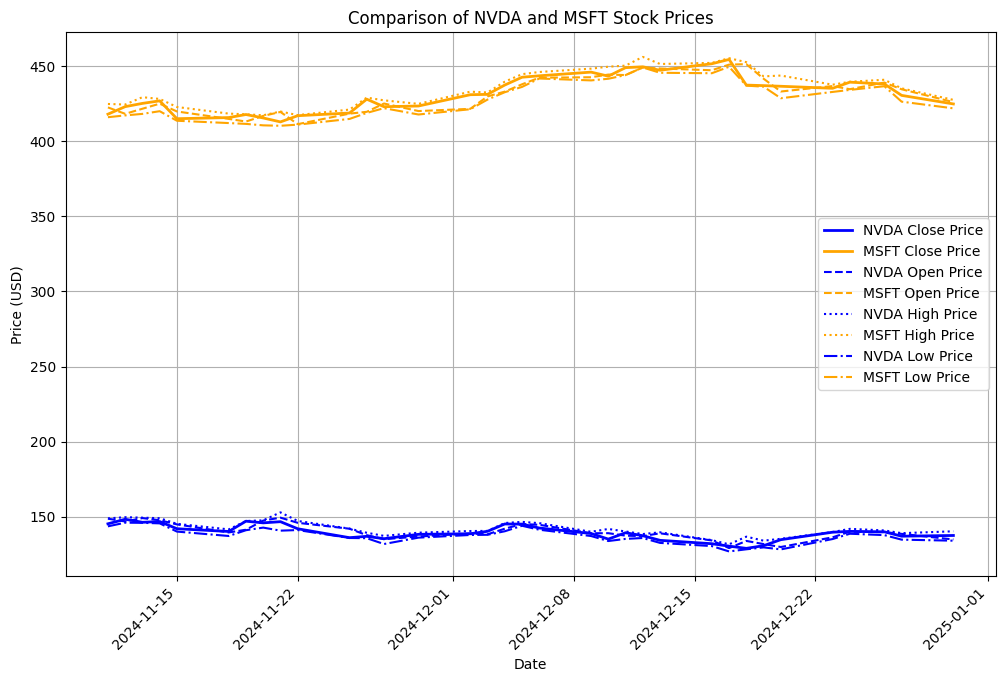

In [4]:

# Main function for comparison
def main():
    # Initialize the linked list for stock data
    stock_list = StockLinkedList()

    # Get the first stock symbol from the user
    symbol1 = input(f"Enter the first stock symbol from {STOCK_OPTIONS}: ").upper()
    while symbol1 not in STOCK_OPTIONS:
        print(f"Invalid choice. Please choose from {STOCK_OPTIONS}")
        symbol1 = input(f"Enter the first stock symbol from {STOCK_OPTIONS}: ").upper()

    # Get the second stock symbol from the user
    symbol2 = input(f"Enter the second stock symbol from {STOCK_OPTIONS}: ").upper()
    while symbol2 not in STOCK_OPTIONS:
        print(f"Invalid choice. Please choose from {STOCK_OPTIONS}")
        symbol2 = input(f"Enter the second stock symbol from {STOCK_OPTIONS}: ").upper()

    # Get start date from the user
    start_date = input("Enter the start date (YYYY-MM-DD): ")

    # Automatically set the end date to today's date
    end_date = datetime.today().strftime('%Y-%m-%d')
    print(f"End date is automatically set to today's date: {end_date}")

    # Fetch stock data from the linked list or fetch and store if not found
    df1 = stock_list.find_stock(symbol1)
    df2 = stock_list.find_stock(symbol2)
    
    # If data for the stock is not found in the linked list, fetch it and store
    if df1 is None:
        df1 = fetch_stock_data(symbol1, start_date, end_date)
        if df1 is not None:
            stock_list.add_stock(symbol1, df1)
    
    if df2 is None:
        df2 = fetch_stock_data(symbol2, start_date, end_date)
        if df2 is not None:
            stock_list.add_stock(symbol2, df2)

    if df1 is not None and df2 is not None:
        # Predict stock price for the next day for both stocks
        predicted_price1 = predict_stock_price(df1)
        predicted_price2 = predict_stock_price(df2)
        print(f"Predicted price for {symbol1}: ${predicted_price1:.2f}")
        print(f"Predicted price for {symbol2}: ${predicted_price2:.2f}")
        
        # Visualize the data for both stocks
        visualize_data(df1, df2, symbol1, symbol2)

if __name__ == "__main__":
    main()

In [9]:
# Main function to handle user input and display stock data
def main():
    # Get stock symbol from the user
    symbol = input("Enter the stock symbol (e.g., AAPL, MSFT, GOOGL): ").upper()

    # Get start and end dates from the user
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    # Fetch the stock data
    df = fetch_stock_data(symbol, start_date, end_date)

    # If data is successfully fetched, display it in table format
    if df is not None:
        # Reset the index to include the date as a column
        df.reset_index(inplace=True)
        
        # Display the stock data as a table
        print(f"\nStock data for {symbol} from {start_date} to {end_date}:")
        print(df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Run the main function
if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed


Stock data for AAPL from 2014-01-01 to 2014-12-12:
Price        Date       Open       High        Low      Close  Adj Close  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2014-01-02  19.845715  19.893929  19.715000  19.754642  17.234295   
1      2014-01-03  19.745001  19.775000  19.301071  19.320715  16.855732   
2      2014-01-06  19.194643  19.528570  19.057142  19.426071  16.947638   
3      2014-01-07  19.440001  19.498571  19.211430  19.287144  16.826445   
4      2014-01-08  19.243214  19.484285  19.238930  19.409286  16.933004   
..            ...        ...        ...        ...        ...        ...   
234    2014-12-05  28.997499  29.020000  28.660000  28.750000  25.609850   
235    2014-12-08  28.525000  28.662500  27.905001  28.100000  25.030844   
236    2014-12-09  27.547501  28.575001  27.337500  28.530001  25.413874   
237    2014-12-10  28.602501  28.712500  27.885000  27.987499  24.930630   
238    2014-12-11  28.065001  28.450